<a target="_blank" href="https://colab.research.google.com/github/cyneuro/CI-BioEng-Class/blob/main/cs4001_allen.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Downloading and building cells from AllenDB

Useful links:
1. [Database](http://celltypes.brain-map.org/data)
2. [Downloading biophysical models](https://allensdk.readthedocs.io/en/latest/biophysical_models.html)
3. [Example on building cells](https://alleninstitute.github.io/AllenSDK/_static/examples/nb/pulse_stimulus.html)

In [1]:
!pip install --upgrade pip
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import os
import json
import matplotlib.pyplot as plt

## Download the cell

In [3]:
bp = BiophysicalApi()
specimen_id = 476686112
# Mouse Layer 5 Primary visual area neuron
# http://celltypes.brain-map.org/experiment/electrophysiology/476686112
bp.get_neuronal_models(specimen_id)

[{'id': 477878284,
  'name': 'Biophysical - perisomatic_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 329230710,
  'specimen_id': 476686112},
 {'id': 497232660,
  'name': 'Biophysical - all active_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 491455321,
  'specimen_id': 476686112}]

In [4]:
# Download the cell with passive dendrites
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(477878284) # 'id'

2025-02-15 21:52:04,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
2025-02-15 21:52:06,152 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
2025-02-15 21:52:06,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-15 21:52:06,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

## Build the cell

In [32]:
# Compile the modfiles
!nrnivmodl modfiles

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/AMPA_NMDA.mod" "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/GABA_AB.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/AMPA_NMDA.mod
 -> NMODL ../modfiles/CaDynamics.mod
Translating AMPA_NMDA.mod into /content/x86_64/AMPA_NMDA.c
Translating CaDynamics.

In [33]:
# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

In [34]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


### MARK1

In [ ]:
h.soma[0].diam

12.661399841308594

In [ ]:
h.soma[0].diam = h.soma[0].diam * 0.9

In [ ]:
# Get this from the built cell
computed_soma_area = 5.036323076932052e-06 # (cm2)

In [ ]:
user_provided_Rin = 195.4 * 10e6 # (Ohm)
user_provided_tau = 15.6 * 1e-3 # (s)
user_provided_Vrest = -71 # (mV)

In [ ]:
g_bar_leak = (1 / user_provided_Rin) / computed_soma_area
cm = user_provided_tau * g_bar_leak * 1e6
print(f"E_leak: {user_provided_Vrest}")
print(f"gbarleak: {g_bar_leak}")
print(f"Cm: {cm}")

E_leak: -71
gbarleak: 0.00010161594458832541
Cm: 1.5852087355778763


In [ ]:

fit_filename = os.path.join(f"{specimen_id}_fit.json")

with open(fit_filename,'r') as file:
    data = json.load(file)


#set all sections cm to the same
for item in data['passive']:
    for field in item['cm']:
        field['cm'] = cm


for item in data["genome"]:
  if (item['name'] == 'g_pas'):
    item['value'] = g_bar_leak


#set e_rev_leak in all sections
data['passive'][0]['e_pas'] = user_provided_Vrest

data['conditions'][0]['v_init'] = user_provided_Vrest

with open(fit_filename, 'w') as file:
    json.dump(data, file, indent=4)

Now update those in the fit file. Restart the runtime and rebuild the cell.

### MARK2

In [195]:
!nrnivmodl modfiles

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/AMPA_NMDA.mod" "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/GABA_AB.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/Kd.mod
Translating Kd.mod into /content/x86_64/Kd.c
Thread Safe
 -> Compiling Kd.c
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [205]:
# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


In [206]:
# Set current injection
stim = h.IClamp(h.soma[0](0.5))
stim.amp = -0.1
stim.delay = 300.0
stim.dur = 400.0
h.tstop = 1000.0
h.dt = 0.1
h.steps_per_ms = 1 / h.dt

In [109]:
---

SyntaxError: invalid syntax (<ipython-input-109-29e0c3615294>, line 1)

In [110]:
vec = utils.record_values()

In [111]:

h.finitialize()
h.run()

0.0

Text(0, 0.5, 'Voltage (mV)')

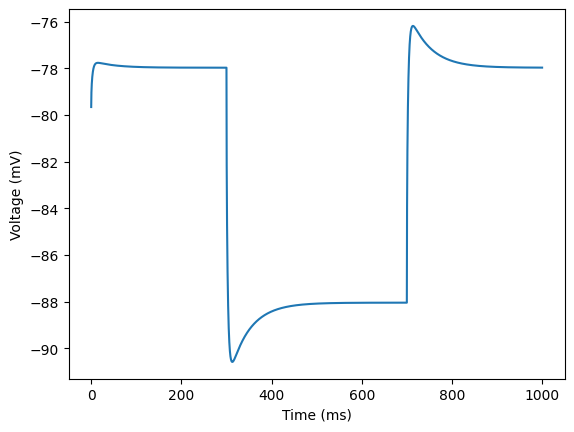

In [112]:
plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

In [113]:
3.095338402020649e-08 * 1.5

4.6430076030309735e-08

In [207]:
import numpy as np
def compute_gpp(passive_V: np.ndarray, dt: float, I_t_start: int, I_t_end: int, I_amp: float):
    '''
    Parameters:
    ----------
    I_t_start: float
        Current injection start time (ms).
    '''

    index_V_rest = int(I_t_start / dt) - 1

    # If there is no h channel, V_final == V_trough
    index_V_trough = index_V_rest + np.argmin(passive_V[index_V_rest:])
    index_V_final = int(I_t_end / dt) - 1

    V_rest = passive_V[index_V_rest]
    V_trough = passive_V[index_V_trough]
    V_final = passive_V[index_V_final]

    # R_in
    R_in = (V_rest - V_trough) / (0 - I_amp)

    # Tau1
    V_tau1 = V_rest - (V_rest - V_trough) * 0.632

    index_v_tau1 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_rest:]))
                if voltage_value < V_tau1
            )
    tau1 = index_v_tau1 * dt

    # Tau2
    V_tau2 = V_trough - (V_trough - V_final) * 0.632
    index_v_tau2 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_trough:]))
                if voltage_value > V_tau2
            )
    tau2 = index_v_tau2 * dt

    # Sag ratio
    sag = (V_final - V_trough) / (V_rest - V_trough)

    gpp = (R_in, tau1, tau2, sag)
    return gpp

In [208]:
#R_in, tau1, tau2, sag_ratio)
trace = vec['v'].as_numpy()

res = list(compute_gpp(trace, h.dt, stim.delay,stim.delay + stim.dur, stim.amp))
res.append(trace[int(stim.delay / h.dt) - 1])
print(f"R_in: {round(res[0],6)}\ntau1: {round(res[1],6)}\ntau2: {round(res[2],6)}\nsag: {round(res[3],6)}\nRMP: {round(res[4],6)}")


R_in: 259.754467
tau1: 0.4
tau2: 1.8
sag: 0.453779
RMP: -66.012994


In [209]:
# Biophysical properties (mean±SD)


# SST

# RMP (mV)	    -65.75±3.76
# Rm (MOhm)	    188.7±9736
# Cm (pF)	      96.46±50.01
# Tau (ms)	    15.6±8.6
# Sag ratio	    0.85±0.09
# Rheobase (pA)	90±38.25
# Rin (MOhm)	  195.4±75.93

#PV (n=15)
# RMP (mV)      -71.25+5.6
# Rm (MOhm)     88.97±36.3
# Cm (pF)       78±50.18
# Tau (ms)      5.9±2.9
# Sag ratio     0.96±0.02
# Rheobase (pA) 225±112.2
# Rin (MOhm)    98.9±34.48




In [210]:
def count_voltage_events(t, v):
    """
    Counts the number of times the voltage goes above -20 mV and the slope changes from positive to negative.

    Args:
        t: A NumPy array of time points.
        v: A NumPy array of voltage values.

    Returns:
        The number of events.
    """

    # Calculate the slope of the voltage
    slope = np.diff(v)

    # Find the indices where the voltage is above -20 mV
    above_threshold_indices = np.where(v[:-1] > -20)[0]

    # Find the indices where the slope changes from positive to negative
    positive_to_negative_indices = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0]

    # Find the intersection of the two sets of indices
    event_indices = np.intersect1d(above_threshold_indices, positive_to_negative_indices)

    return len(event_indices)

In [211]:
# Set current injection
h.tstop = 1500

spikes = []

for amp in [-0.05, 0, 0.05, 0.1, 0.2]:
    stim.amp = amp
    stim.delay = 300.0
    stim.dur = 1000

    vec = utils.record_values()
    h.finitialize()
    h.run()

    spikes.append(count_voltage_events(vec['t'].as_numpy(), vec['v'].as_numpy()))

In [212]:
spikes

[0, 0, 0, 0, 0]

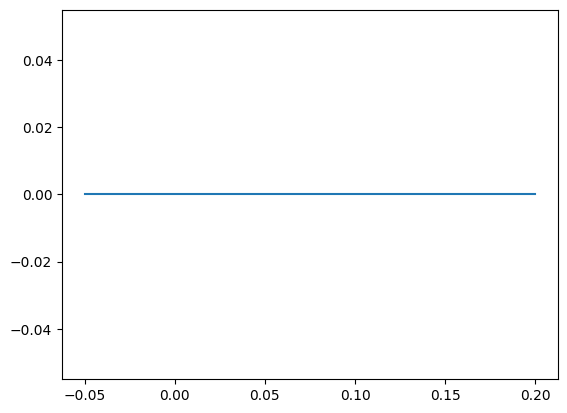

In [213]:
plt.plot([-0.05, 0, 0.05, 0.1, 0.2], spikes)

In [214]:
stim.amp = 0.2
stim.delay = 300.0
stim.dur = 1000

ina = h.Vector().record(h.soma[0](0.5)._ref_ina)
ik = h.Vector().record(h.soma[0](0.5)._ref_ik)

vec = utils.record_values()
h.finitialize()
h.run()

0.0

In [215]:
3.095338402020649e-08 * 2

6.190676804041298e-08

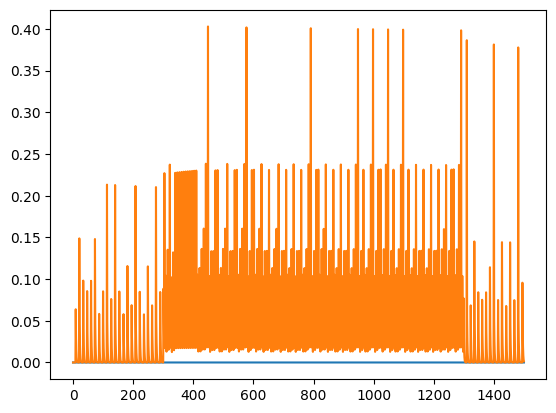

In [216]:
plt.plot(ina.as_numpy()[::10])
plt.plot(ik.as_numpy()[::10])

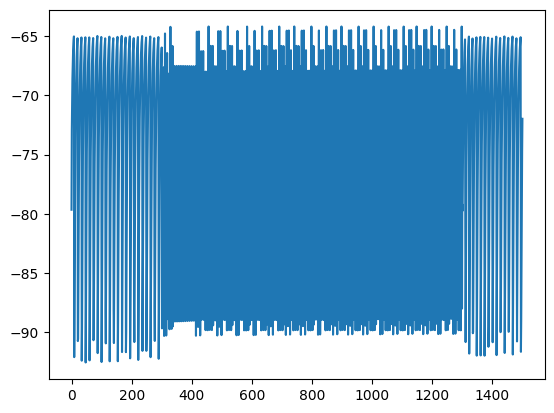

In [204]:
plt.plot(vec['v'].as_numpy()[::10])

In [170]:
h.soma[0].L

12.661407470703125

In [166]:
h.soma[0](0.5).diam

12.661399841308594

## Homework

1. Choose any active mouse cell model from the [database](http://celltypes.brain-map.org/data). When searching, put "Has All-active Biophysical model" on.
2. Simulate the cell for different values of current injection (CI). Plot voltage responses (t vs V) for each CI. Then plot the FI curve.